# *Insurance Premium Prediction*

## QUESTION  
> Build a predictive linear regression model to estimate insurance premiums using a dataset named
"insurance.csv." Visualize the data distribution by creating a scatter plot with a separable line.
The x-axis should represent "BMI," and the y-axis should depict "Insurance Charges”.
Apply the gradient descent method to optimise the cost using the provided learning rate
of 0.000001. 
 

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [56]:
# Let us load the dataset
df = pd.read_csv("insurance.csv")

In [57]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "expenses" column using the values in the other columns. We can do it for the historical data, then we will estimate expenses for new customers, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [58]:
# Print the more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here are some statistics for the numerical columns:

In [59]:
# Let us see statistical information about the Numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
# Let us see more statiscal information of the categorical features 
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.


The following settings will improve the default style and font sizes for our charts.

In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [62]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [63]:
fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)


We can make the following observations from the above graph:

* For most customers, the annual medical expenses are under 10k. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7.3k, the median for smokers is close to 35k.


**Charges**
Let's visualize the distribution of "charges" i.e. premium amount required for insurance. 
This is the column we're trying to predict.
Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [64]:
fig = px.histogram(df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['red', 'green'],
                    title="Insurance Premium Charge")

fig.update_layout(bargap=0.1)
fig.show() 

### Charges and Gender 

Let us visualize the distribution of "expenses" with the categorical column "sex" to distinguish the expenses for "male" and "female"

In [65]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Insurance Premium charge by Sex")

fig.update_layout(bargap=0.1)
fig.show()                    

We can make following observation from the graph

* There is a significant difference in charges between male and female. While the median for male and female is almost same but upper fence for male is 42k, the upper fence for female is close to 28k.

### DIstribution of charges with Region

Let's visualize the distribution of "charges" with categorical column "region" to distinguish expenses for southwest, southeast, northwest and northeast.

In [66]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["red", "orange", "green","violet"],
                    title="Insurance Premiumm charges by Region")

fig.update_layout(bargap=0.1)
fig.show()                    

We make some obervation from the above graph

* There is significant difference in charges for southeast, southwest, northeast and northwest. While the median for southwest is 8798 , the median for southeast is close to 9294, the median for northwest is 8965 and median for northeast is 10.05k.
*  And the upper fence for southwest is close to  26k, upper fence for southeast is close to 42k, upper fence for northwest is close to 4230kk and the upper fence for northeast is close to 34k.

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [67]:
px.histogram(df, x="smoker", color="sex", title="Smoker")

From the above graph we make some observations.

* It appears that 20% of the customers have reported they smoking.
* We can also see that smoking appears a more common habit among males.

In [68]:
px.histogram(df, x="region", color="smoker", title="Region")

In [69]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [146]:
fig = px.scatter(df,
                x="age",
                y="charges",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs charges")

fig.update_traces(marker_size=5)
fig.show()                

We can make the following observations from the above chart:

* The general trend seems to be that premium charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine premium expenses.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low preminum expenses compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     


### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [145]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Charges")

fig.update_traces(marker_size=5)
fig.show()                

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in premium charges. However, premium charges seem to be significantly higher for smokers with a BMI greater than 30.


In [72]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs Charges")

fig.update_traces(marker_size=5)
fig.show()               

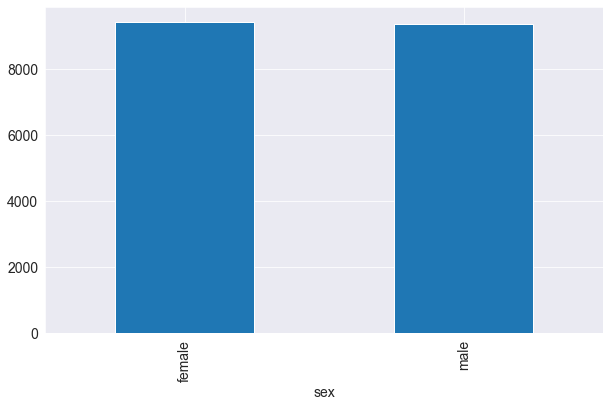

In [73]:
df.groupby("sex")['charges'].median().plot.bar()
plt.show()

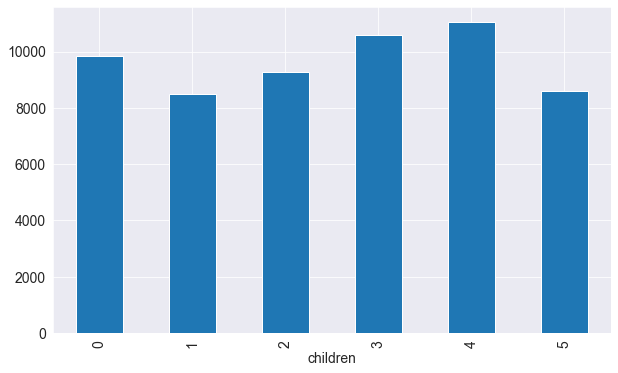

In [74]:
df.groupby("children")['charges'].median().plot.bar()
plt.show()

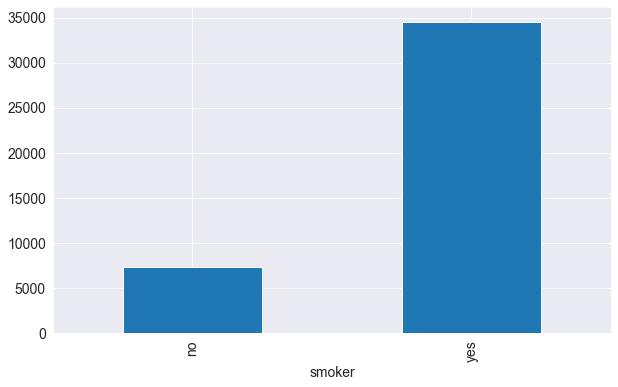

In [75]:
df.groupby("smoker")['charges'].median().plot.bar()
plt.show()

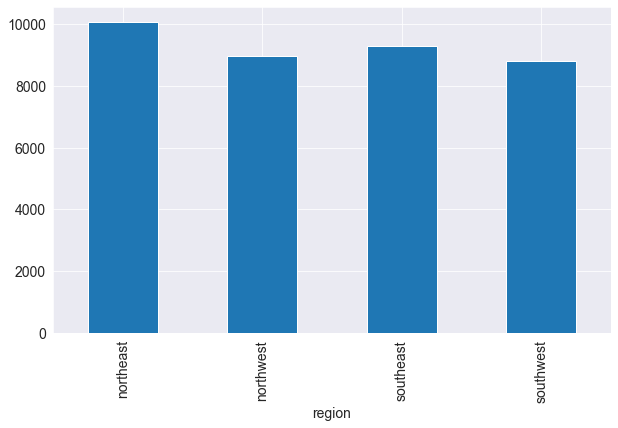

In [76]:
df.groupby("region")['charges'].median().plot.bar()
plt.show()

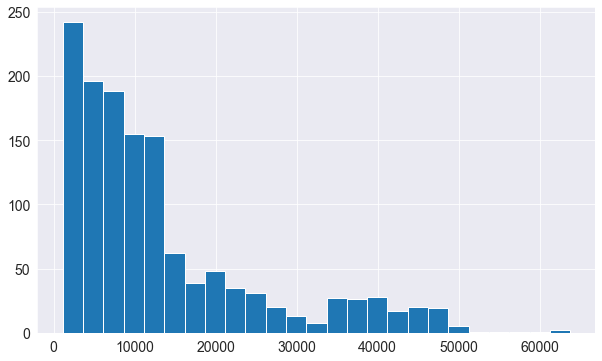

In [77]:
df['charges'].hist(bins=25)
plt.show()

In [78]:
fig = px.histogram(data_frame=df, x='bmi', y='charges', width=800, height=500, title='Charges by BMI')
fig.show()

In [79]:
fig = px.histogram(df, x="bmi", y="charges", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [80]:
fig = px.scatter(df, x="bmi", y="charges", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [81]:
fig = px.pie(data_frame=df, names='sex', values='charges', width=800, height=500, title='Charges by Gender')
fig.show()

In [82]:
fig = px.scatter(df, x="bmi", y="charges", color="sex", width=900, height=500, title="Charges by BMI & Gender")
fig.show()

In [83]:
fig = px.scatter(df, x="bmi", y="charges", color="smoker", width=900, height=500, title="Charges by BMI & Smoker")
fig.show()

In [84]:
fig = px.scatter(df, x="bmi", y="charges", color="region", width=900, height=500, title="Charges by BMI & Region")
fig.show()

From left plot the insurance charge for male and female is approximatley in same range,it is average around 50k.

 In right plot the premium charges for smokers is much wide range compare to non smokers, the average expenses for non smoker is approximately 121.874K. For smoker the minimum premium charge is itself 12.82946K.

### Correlation

In [91]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

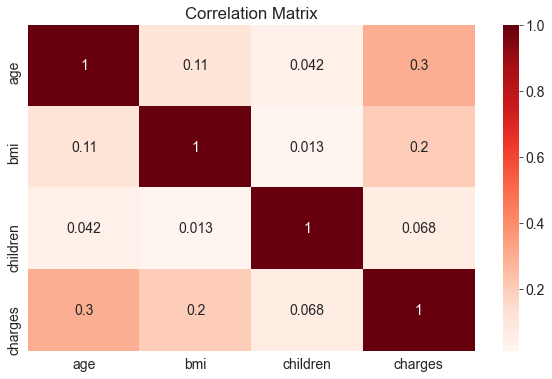

In [92]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 


As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [93]:
df.charges.corr(df.age)

0.2990081933306478

In [94]:
df.charges.corr(df.bmi)

0.19834096883362887

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [95]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.7872514304984778

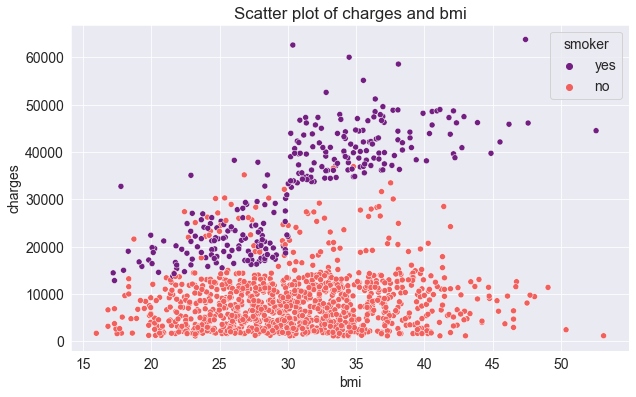

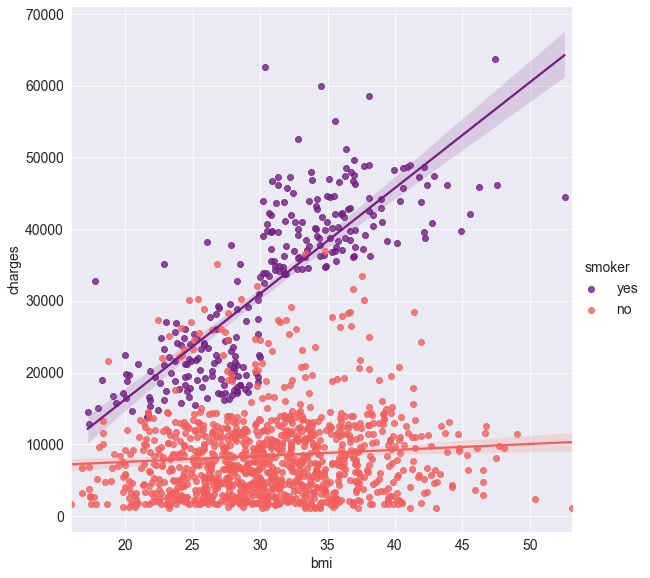

In [96]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)


If we look at the left plot the expenses varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. 

 ## Linear Regression by appling the gradient descent method to optimise the cost using the provided learning rate of 0.000001 Without using external libraries.  
Let's build a model and evaluate using the RMSE. 

Iteration 0: cost = 160906468.70983303
Iteration 1000: cost = 65822835.42361454
Iteration 2000: cost = 65312684.38907829
Iteration 3000: cost = 65293942.50942071
Iteration 4000: cost = 65277933.05323287
Iteration 5000: cost = 65262090.22424765
Iteration 6000: cost = 65246377.397469796
Iteration 7000: cost = 65230774.78956933
Iteration 8000: cost = 65215265.82083182
Iteration 9000: cost = 65199836.54860186
Optimized parameters:
[212.29620948338865, 5.786225491227861, 166.95717463384037, 12.357184918096227, 39.44918597335324]


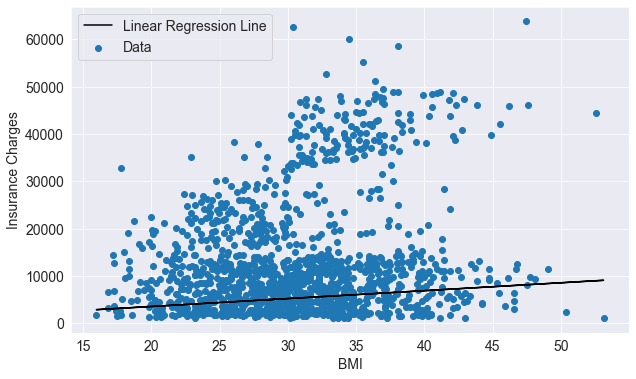

In [149]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Function to load the dataset using pandas
def load_data(filename):
    data = pd.read_csv(filename)
    return data

# Function to preprocess the data and convert it to numerical format
def preprocess_data(data):
    X = data[['age', 'sex', 'bmi', 'children', 'smoker']].copy()
    X['sex'] = X['sex'].apply(lambda x: 0 if x == 'female' else 1)
    X['smoker'] = X['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
    y = data['charges']
    return X.values.tolist(), y.values.tolist()

# Define a function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    num_features = len(theta)

    for iteration in range(num_iterations):
        error = [sum([X[i][j] * theta[j] for j in range(num_features)]) - y[i] for i in range(m)]
        gradient = [sum([error[i] * X[i][j] for i in range(m)]) / m for j in range(num_features)]
        theta = [theta[j] - learning_rate * gradient[j] for j in range(num_features)]

        if iteration % 1000 == 0:
            cost = sum([error[i] ** 2 for i in range(m)]) / (2 * m)
            print(f"Iteration {iteration}: cost = {cost}")

    return theta

# Load the data
data = load_data("insurance.csv")

# Preprocess the data
X, y = preprocess_data(data)

# Initialize the parameters
theta = [random.uniform(0, 1) for _ in range(5)]

# Set learning rate and number of iterations
learning_rate = 0.000001
num_iterations = 10000

# Perform gradient descent
theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Print the optimized parameters
print("Optimized parameters:")
print(theta)

# Visualize the data and the predicted line
bmi_values = [x[2] for x in X]
predicted_charges = [theta[0] + theta[2] * bmi for bmi in bmi_values]
plt.scatter(bmi_values, y, label="Data")
plt.plot(bmi_values, predicted_charges, color='black', label="Linear Regression Line")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()


In [5]:
import os
import json
import time
from io import BytesIO
import requests

 

timestamp = int(time.time() * 1000)
url = "http://www.indianrail.gov.in/enquiry/FetchTrainData?_={}".format(timestamp)
r = requests.get(url)
data = {}
for train in r.json():
    key = train.split(' - ')[0]
    data[key] = train
print(data)
      

{'01131': '01131 - PVR MRJ SPECIAL', '12303': '12303 - POORVA EXPRESS', '22407': '22407 - ANVT GARIB RATH', '01047': '01047 - CSMT MADGAON SPL', '09493': '09493 - ADI GKP SPL', '07034': '07034 - CCT SC SPL', '17020': '17020 - HYB HSR EXPRESS', '14233': '14233 - SARYU EXP', '16232': '16232 - MAILADUTURAIEXP', '22101': '22101 - LTT MADURAI EXP', '05046': '05046 - RJT LKU SPL', '07487': '07487 - NED CCT SPL', '22968': '22968 - PRYJ ADI SF EXP', '18628': '18628 - INTERCITY EXP', '22164': '22164 - MAHAMANA EXP', '09040': '09040 - BME BDTS SF SPL', '14817': '14817 - BGKT BDTS EXP', '16305': '16305 - ERS CAN EXPRESS', '12822': '12822 - DHAULI EXPRESS', '14208': '14208 - PADMAVAT EXP', '05655': '05655 - ANVT GHY SPECIAL', '13225': '13225 - INTERCITY EXP', '12740': '12740 - GARIBRATH EXP', '14228': '14228 - VARUNA EXP', '06302': '06302 - DWK MDU SPL', '11274': '11274 - PCOI ET EXPRESS', '13331': '13331 - DHN PNBE EXPRES', '20658': '20658 - NZM UBL SF EXP', '12341': '12341 - AGNIVEENA EXP', '085